# ANÁLISE DA COVID SOBRE OS PAÍSES E RELAÇÃO COM A QUALIDADE INSTITUCIONAL

#### Arthur Gennari Santi
#### Arthur Wachslicht
#### José Vitor Velho Costa
#### Otávio Farhat Fernandes
####Gabriel Lupovici Moritz
Pedro Osorio Magaldi Netto 

## Importação de Bibliotecas

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import iqr
import matplotlib.pyplot as plt
from plotnine import *
import locale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

C:\Users\ferna\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Users\ferna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\Users\ferna\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Us

## Importação dos dados

In [5]:
covid = pd.read_csv("covid_APS_PyCD.csv", sep = None, decimal = ",", )
covid = covid.dropna()
covid.head()
#covid.describe()
#theme_set(theme_bw());

C:\Users\ferna\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.


,﻿Geography,Population Density,year,code,Healthspd,Government Spending Score,Population,Obesity,continent,date,...,total_deaths,aged_65_older,total_cases_per_million,total_deaths_per_million,stringency_index,Rural Population,institutional_index,percentage_rural_pop,institutional_index_new,turismo
0,Afghanistan,58.3,2019,AFG,7.6,80.3,38041800,5.1,Asia,30/11/2020,...,1763.0,2.581,1160.148,44.257,12.04,28244500.0,-4.113828,0.742460,0.006505,0
2,Azerbaijan,120.8,2019,AZE,46.5,59.5,9981500,21.7,Asia,30/11/2020,...,1392.0,6.018,11852.873,136.159,69.91,4633800.0,-1.946761,0.464239,0.271936,3170000
3,Bangladesh,1252.6,2019,BGD,18.3,94.5,163046200,4.0,Asia,30/11/2020,...,6644.0,5.098,2795.684,39.951,80.09,102058800.0,-2.378168,0.625950,0.219095,323000
5,China,149.0,2019,CHN,340.1,70.1,1398868500,7.7,Asia,30/11/2020,...,4634.0,10.641,59.955,3.209,81.94,565808400.0,-1.185340,0.404476,0.365198,162538000
6,Fiji,48.7,2019,FJI,172.1,71.7,890000,31.8,Oceania,30/11/2020,...,2.0,6.224,46.517,2.215,49.07,384900.0,0.148568,0.432472,0.528580,969000


In [6]:
covidpad = pd.read_csv("covid_pad.csv", sep = None, decimal = ",", )
covidpad = covid.dropna()
covidpad.head()
#covid.describe()
#theme_set(theme_bw());

C:\Users\ferna\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.


,﻿Geography,Population Density,year,code,Healthspd,Government Spending Score,Population,Obesity,continent,date,...,total_deaths,aged_65_older,total_cases_per_million,total_deaths_per_million,stringency_index,Rural Population,institutional_index,percentage_rural_pop,institutional_index_new,turismo
0,Afghanistan,58.3,2019,AFG,7.6,80.3,38041800,5.1,Asia,30/11/2020,...,1763.0,2.581,1160.148,44.257,12.04,28244500.0,-4.113828,0.742460,0.006505,0
2,Azerbaijan,120.8,2019,AZE,46.5,59.5,9981500,21.7,Asia,30/11/2020,...,1392.0,6.018,11852.873,136.159,69.91,4633800.0,-1.946761,0.464239,0.271936,3170000
3,Bangladesh,1252.6,2019,BGD,18.3,94.5,163046200,4.0,Asia,30/11/2020,...,6644.0,5.098,2795.684,39.951,80.09,102058800.0,-2.378168,0.625950,0.219095,323000
5,China,149.0,2019,CHN,340.1,70.1,1398868500,7.7,Asia,30/11/2020,...,4634.0,10.641,59.955,3.209,81.94,565808400.0,-1.185340,0.404476,0.365198,162538000
6,Fiji,48.7,2019,FJI,172.1,71.7,890000,31.8,Oceania,30/11/2020,...,2.0,6.224,46.517,2.215,49.07,384900.0,0.148568,0.432472,0.528580,969000


## Dicionário de Variáveis

In [7]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 122
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ﻿Geography                 113 non-null    object 
 1   Population Density         113 non-null    float64
 2   year                       113 non-null    int64  
 3   code                       113 non-null    object 
 4   Healthspd                  113 non-null    float64
 5   Government Spending Score  113 non-null    float64
 6   Population                 113 non-null    int64  
 7   Obesity                    113 non-null    float64
 8   continent                  113 non-null    object 
 9   date                       113 non-null    object 
 10  total_cases                113 non-null    int64  
 11  total_deaths               113 non-null    float64
 12  aged_65_older              113 non-null    float64
 13  total_cases_per_million    113 non-null    float64

# Freedman-Diaconis Rule

In [8]:
fdhealth = 2 * iqr(covid.Healthspd) / len(covid)**(1/3) 
fdindex = 2 * iqr(covid.institutional_index_new) / len(covid)**(1/3)

# Número de Países por continente

In [9]:
#covid.value_counts("continent").to_frame("n").reset_index()

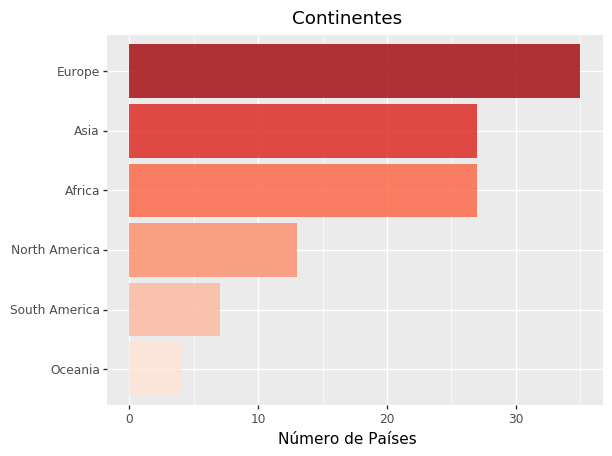

<ggplot: (-9223371875898076633)>

In [10]:
(covid.value_counts("continent").to_frame("n").reset_index()
      .sort_values("n")
      .assign(continent = lambda _: pd.Categorical(_.continent, _.continent))
      .pipe(lambda _: ggplot(_, aes(x = "continent", y = "n", fill = "continent")) +
                          geom_col(alpha = 0.85) +
                          labs(x = "", y = "Número de Países", title = "Continentes") +
                          scale_fill_brewer(palette = "Reds") + # "Blues", "Greens", "Reds"
                          theme(legend_position = "none") +
                          coord_flip()))

# Distribuição de Qualidade Institucional por País

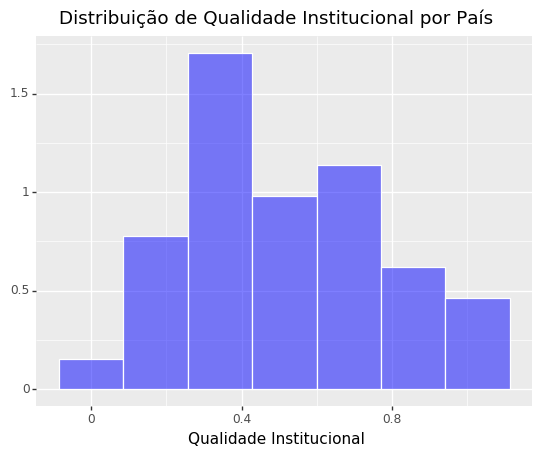

<ggplot: (-9223371875876337499)>

In [11]:
(ggplot(covid, aes(x = "institutional_index_new", y = "stat(density)")) +
     geom_histogram(binwidth = fdindex, fill = "blue", color = "white", alpha = 0.5) +
     labs(x = "Qualidade Institucional", y = "", title = "Distribuição de Qualidade Institucional por País"))

# Distribuição de Qualidade Institucional por Continente

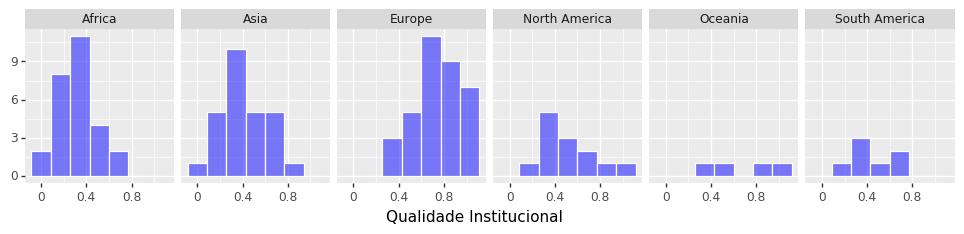

<ggplot: (-9223371875876295757)>

In [12]:
(ggplot(covid, aes(x = "institutional_index_new")) +
     geom_histogram(binwidth = fdindex, fill = "blue", color = "white", alpha = 0.5) +
     labs(x = "Qualidade Institucional", y = "") +
     facet_wrap("~ continent", nrow = 1) +
     theme(figure_size = (12, 2)))

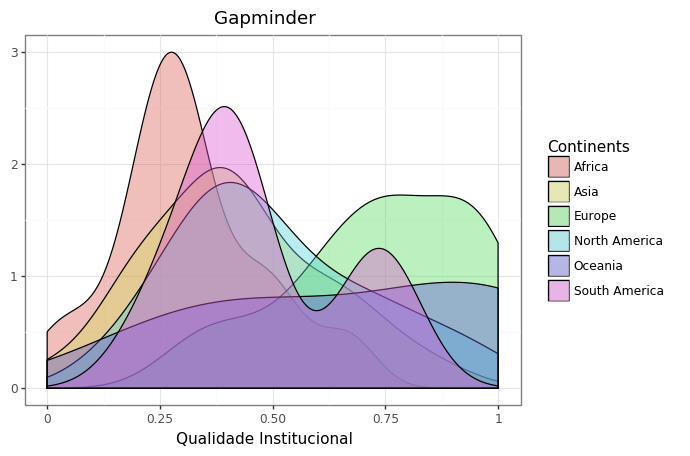

<ggplot: (133446013318)>

In [91]:
(ggplot(covid, aes(x = "institutional_index_new", fill = "continent")) +
     geom_density(alpha = 0.4) +
     labs(x = "Qualidade Institucional", y = "", fill = "Continents", title = "Gapminder"))

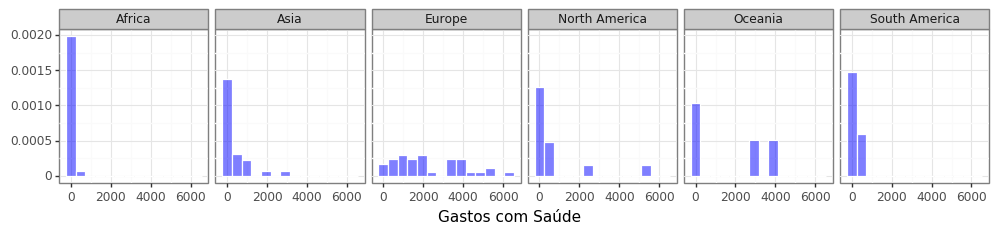

<ggplot: (133444692975)>

In [93]:

(ggplot(covid, aes(x = "Healthspd", y = "stat(density)")) +
     geom_histogram(binwidth = fdhealth, fill = "blue", color = "white", alpha = 0.5) +
     labs(x = "Gastos com Saúde", y = "") +
     facet_wrap("~ continent", nrow = 1) +
     theme(figure_size = (12, 2)))

# Distanciamento é o inverso de Stringency_index

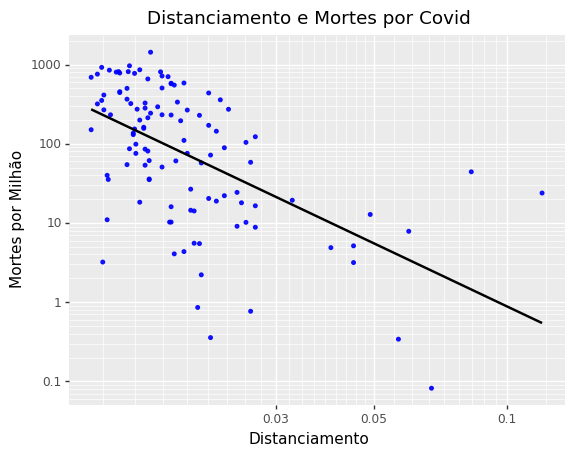

<ggplot: (-9223371861892600239)>

In [26]:
covid = covid.assign(distanciamento = lambda _: (1/_.stringency_index))

(ggplot(covid, aes(x = "distanciamento", y = "total_deaths_per_million")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Distanciamento", y = "Mortes por Milhão", title = "Distanciamento e Mortes por Covid"))

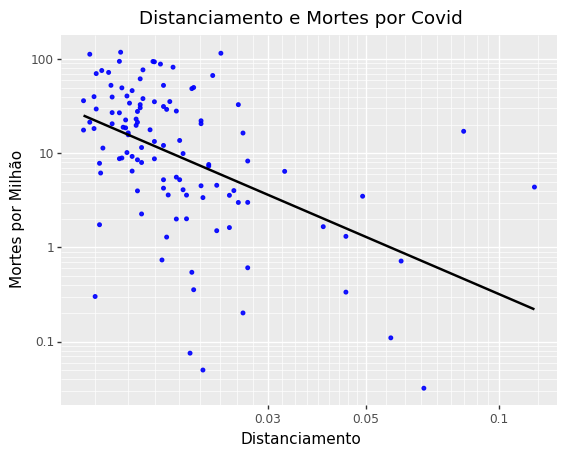

<ggplot: (174963483926)>

In [38]:
covidpad = covidpad.assign(distanciamento = lambda _: (1/_.stringency_index))

(ggplot(covidpad, aes(x = "distanciamento", y = "mortes_pad")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Distanciamento", y = "Mortes por Milhão", title = "Distanciamento e Mortes por Covid"))

# Relação entre Gastos com Saúde e Covid

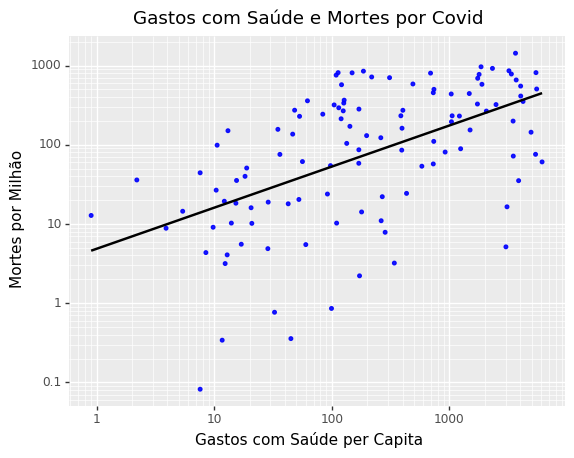

<ggplot: (174962295037)>

In [10]:
(ggplot(covid, aes(x = "Healthspd", y = "total_deaths_per_million")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Gastos com Saúde per Capita", y = "Mortes por Milhão",
          title = "Gastos com Saúde e Mortes por Covid"))

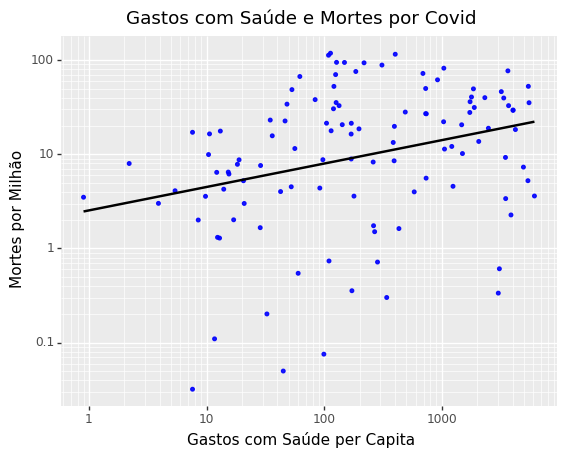

<ggplot: (-9223371861892550733)>

In [39]:
(ggplot(covid, aes(x = "Healthspd", y = "mortes_pad")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Gastos com Saúde per Capita", y = "Mortes por Milhão",
          title = "Gastos com Saúde e Mortes por Covid"))

# Tentando controlar por quantidade de idosos

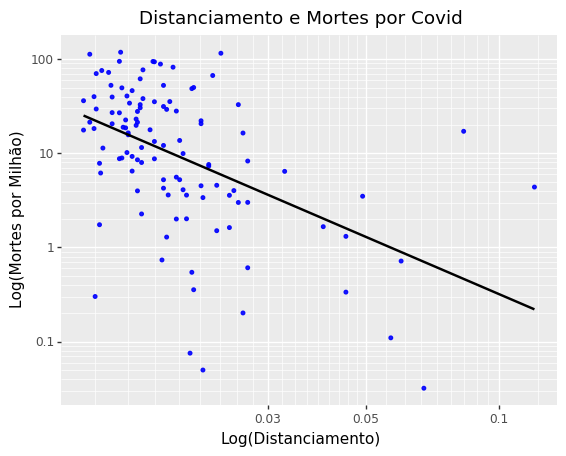

<ggplot: (174959853509)>

In [11]:
covid["mortes_pad"] = (covid["total_deaths_per_million"]/covid["aged_65_older"])
(ggplot(covid, aes(x = "distanciamento", y = "mortes_pad")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Log(Distanciamento)", y = "Log(Mortes por Milhão)", title = "Distanciamento e Mortes por Covid"))

# Estudando os casos mais extremos; primeiro e último quartil de qualidade institucional

In [15]:
prim_quan = np.quantile(covid["institutional_index_new"], .25)
ulti_quan = np.quantile(covid["institutional_index_new"], .75)
covid = covid.assign(inst_ext = lambda _: np.where(_.institutional_index_new < prim_quan, "Extrativa",
                                           np.where(_.institutional_index_new > ulti_quan, "Inclusiva", 0)))


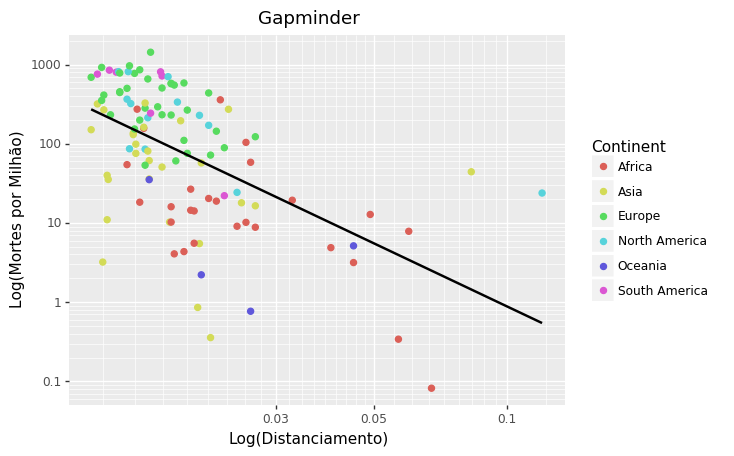

<ggplot: (174963375357)>

In [12]:
(ggplot(covid, aes(x = "distanciamento", y = "total_deaths_per_million")) +
     geom_point(aes(color = "continent"), size = 2) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Log(Distanciamento)", y = "Log(Mortes por Milhão)",
                  color = "Continent", title = "Gapminder"))

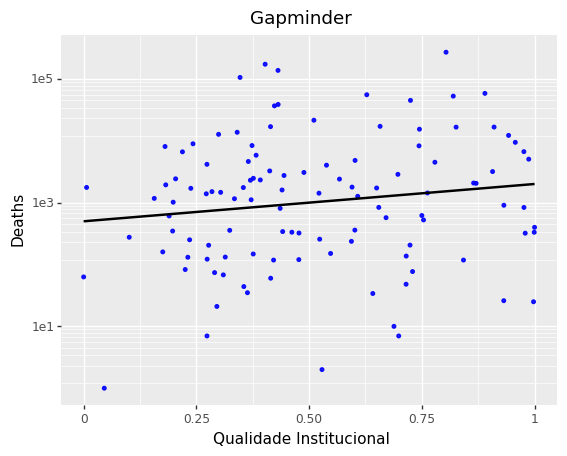

<ggplot: (-9223371861888713549)>

In [46]:
(ggplot(covid, aes(x = "institutional_index_new", y = "total_deaths")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_y_log10() +# muita transparência!
     labs(x = "Qualidade Institucional", y = "Deaths", color = "Continent", title = "Gapminder"))

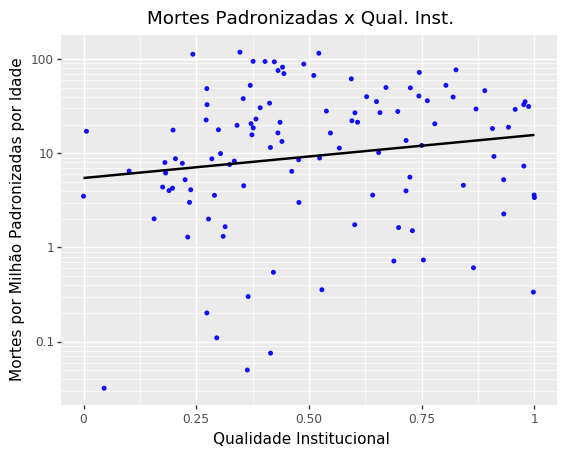

<ggplot: (174962194608)>

In [49]:
(ggplot(covid, aes(x = "institutional_index_new", y = "mortes_pad")) +
     geom_point(color = "blue", size = 1, alpha = 0.9) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_y_log10() +# muita transparência!
     labs(x = "Qualidade Institucional", y = "Mortes por Milhão Padronizadas por Idade",
                                          color = "Continent", title = "Mortes Padronizadas x Qual. Inst."))

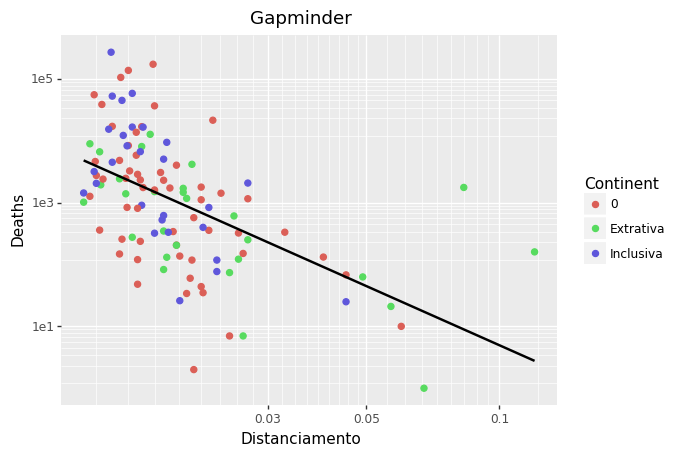

<ggplot: (-9223371861891059375)>

In [17]:
(ggplot(covid, aes(x = "distanciamento", y = "total_deaths")) +
     geom_point(aes(color = "inst_ext"), size = 2) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Distanciamento", y = "Deaths", color = "Continent", title = "Gapminder"))

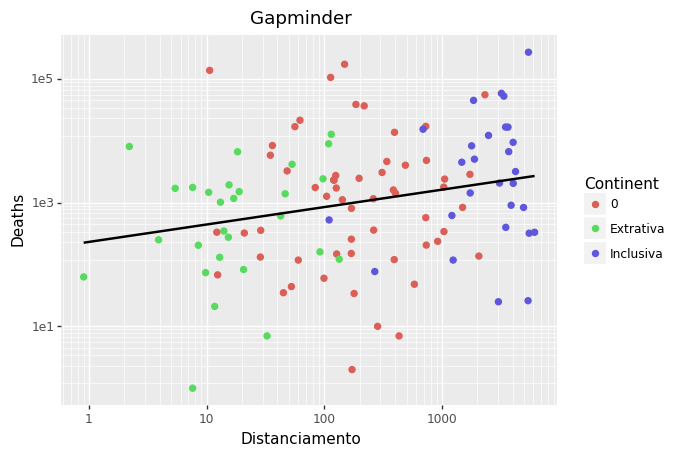

<ggplot: (174963775450)>

In [18]:
(ggplot(covid, aes(x = "Healthspd", y = "total_deaths")) +
     geom_point(aes(color = "inst_ext"), size = 2) +
     geom_smooth(color = "black", method = "lm", alpha = .5, se = False)+
     scale_x_log10() +
     scale_y_log10() +# muita transparência!
     labs(x = "Distanciamento", y = "Deaths", color = "Continent", title = "Gapminder"))